# House Prices: Advanced Regression Techniques

The goal of this competition is to predict the final price of homes in Ames, Iowa based on 79 explanatory variables. 
Accuracy of the prediction is evaluated by Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

In the notebook, I explore the data, fill in the missing values, do data visualisation and then try several regression models for prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import stats
from scipy.stats import skew
%matplotlib inline
plt.style.use( 'seaborn-dark-palette' )
sns.set_style( 'white' )

# Data Exploration

In [2]:
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')

In [3]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
df_train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [5]:
df_train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1201,1202,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,197900
336,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,377426
1023,1024,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,191000
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
1312,1313,60,RL,NaN,9572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


Lots of variables with missing data. Important looking features might be:  <br>
House quality variables: OverallQual, OverallCond, YearBuilt, YearRemodAdd <br>
Location variable: Neighborhood <br>
Amount of space variables: TotalBsmtSF,GrLivArea, Bedroom,FullBath,HalfBath,TotRmsAbvGrd, LotArea, GarageCars, GarageArea <br>

There are many Variables that don't seem very important. For example:<br> LandContour: Flatness of the property<br>
MasVnrType: Masonry veneer type<br> Foundation: Type of foundation <br>

Lets check the missing values

In [6]:
#Train data
total=df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [7]:
#Test data
total=df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


For these variables null value propably means, it does not exist so they could be replaced with None or 0:<br>
PoolQC: pool quality<br>
MiscFeature: Miscellaneous feature not covered in other categories<br>
Alley<br>
Fence<br>
FireplaceQu: Fireplace quality<br>
All garageX variables: Garage condition variables<br>
BsmntX variables: Basement condition variables<br>
MasVnrType, MasVnrArea: Masonry<br>

Out of these I will just remove all garageX variables as garageCars (Size of garage in car capacity) variable gives the most important information about garages. I will also remove other BsmntX variables in train data expect BsmtCond as the overall condition has the most important information<br>

These variables are replaced with most common/mean values<br>
Lot frontage: Linear feet of street connected to property<br>
Electrical<br>
MSZoning: Identifies the general zoning classification of the sale.<br>
Utilities<br>
Functional 	<br>
SaleType<br>
Exterior1st, Exterior2nd: Exterior covering on house <br>
KitchenQual <br>
GarageArea, GarageCars

In [8]:
#Null to none/zero variables:
nulls=['PoolQC', 'Alley','Fence','FireplaceQu','BsmtCond','MasVnrType','MasVnrArea'
       ,'MiscFeature','BsmtHalfBath','BsmtFullBath','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1']
for column in nulls:
    if df_train[column].dtype == 'object':
        df_train[column].fillna('None',inplace=True)
        df_test[column].fillna('None',inplace=True)
    else:
        df_train[column].fillna(0,inplace=True)
        df_test[column].fillna(0,inplace=True)
#Null to common variables
nulls2=['LotFrontage','Electrical','GarageArea','GarageCars',
        'MSZoning','Utilities','SaleType','Exterior1st','Exterior2nd','KitchenQual','Functional']
for column in nulls2:
    if df_train[column].dtype == 'object':
        df_train[column].fillna(df_train[column].value_counts().idxmax(),inplace=True)
        df_test[column].fillna(df_test[column].value_counts().idxmax(),inplace=True)
    else:
        df_train[column].fillna(df_train[column].mean(),inplace=True)
        df_test[column].fillna(df_test[column].mean(),inplace=True)

Lets see missing values now

In [9]:
#Train data
total=df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageType,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027
BsmtQual,37,0.025342
BsmtFinType1,37,0.025342
RoofMatl,0,0.000000


In [10]:
#Test data
total=df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
GarageCond,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461
GarageQual,78,0.053461
GarageType,76,0.052090
BsmtExposure,44,0.030158
BsmtQual,44,0.030158
BsmtFinType1,42,0.028787
BsmtFinType2,42,0.028787
LandContour,0,0.000000


Lets remove rest of the variables with null values

In [11]:
#Removing missing data
df_train=df_train.drop((missing_data[missing_data['Total'] > 1]).index,axis=1) #Remove unnecessary variables
df_test=df_test.drop((missing_data[missing_data['Total'] > 1]).index,axis=1) #Remove unnecessary variables
df_train.isnull().sum().max()

0

Lets look some interesting looking variables

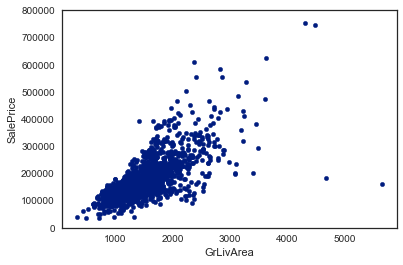

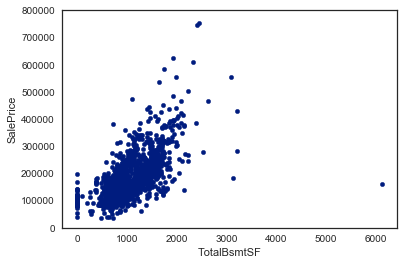

In [12]:
#scatter plot interesting numberical variables/saleprice
var = ['GrLivArea','TotalBsmtSF']
for i in range(len(var)):
    data = pd.concat([df_train['SalePrice'], df_train[var[i]]], axis=1)
    data.plot.scatter(x=var[i], y='SalePrice', ylim=(0,800000));

unsurprisingly the size of the house is highly correlated with the price

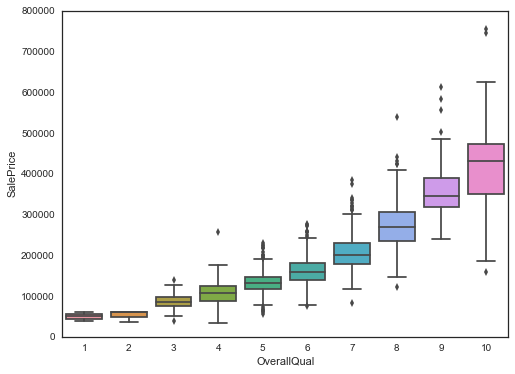

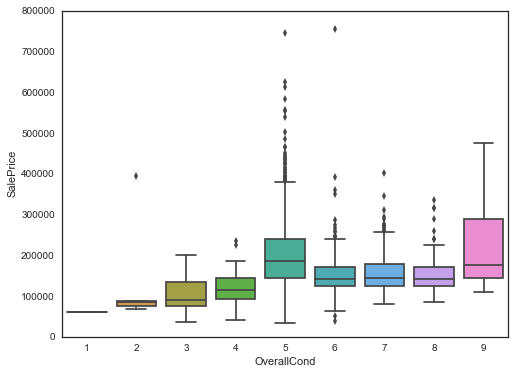

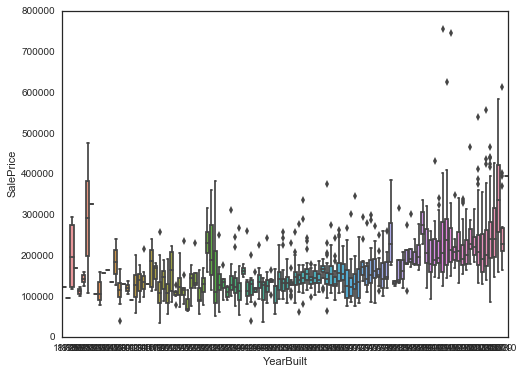

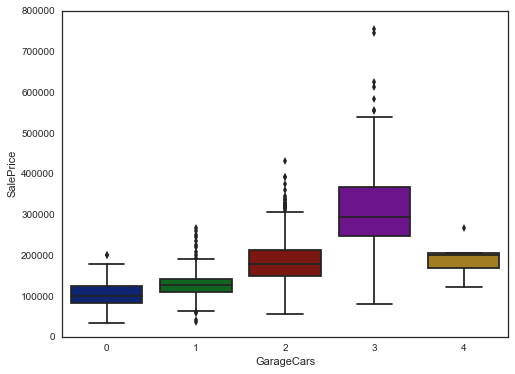

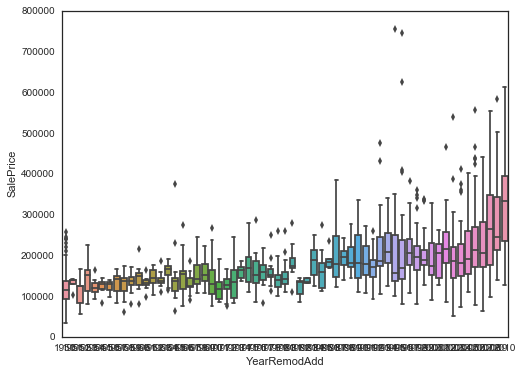

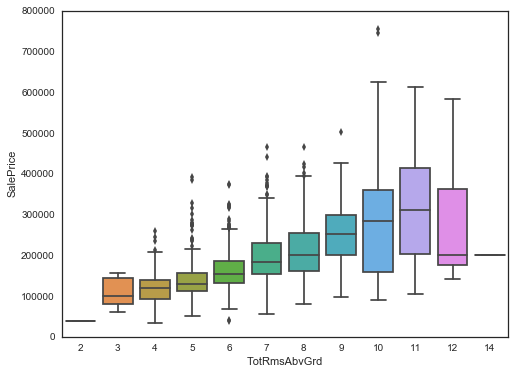

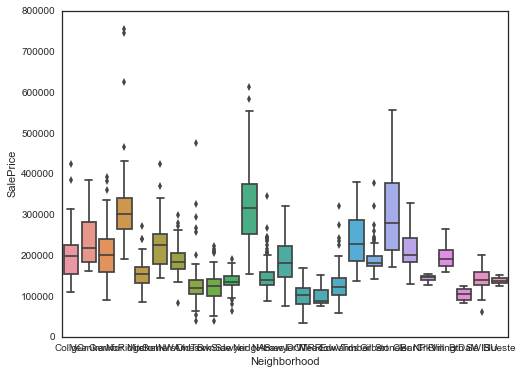

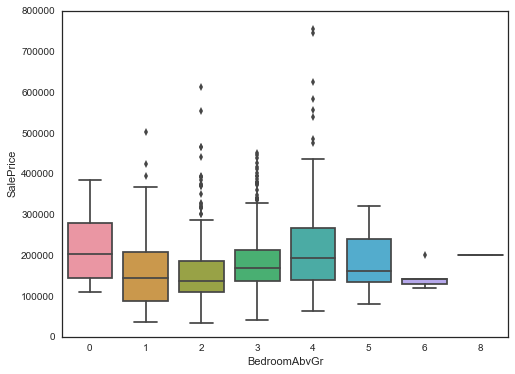

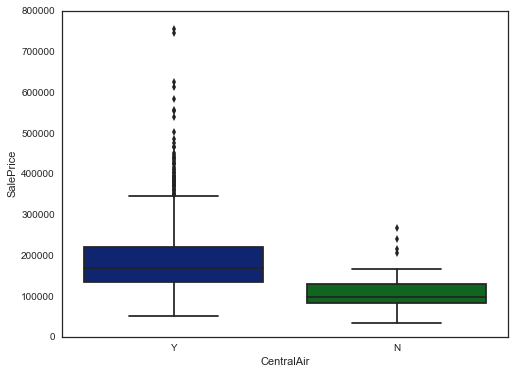

In [13]:
#scatter plot categorical variables/saleprice

var=['OverallQual','OverallCond','YearBuilt','GarageCars','YearRemodAdd',
     'TotRmsAbvGrd','Neighborhood','BedroomAbvGr', 'CentralAir']
for i in range(len(var)):
    data = pd.concat([df_train['SalePrice'], df_train[var[i]]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var[i], y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);

Neighbourhood, central airconditioning,overall material and finish of the house, and how new the house is clearly matter in the price<br>
It seems that most of houses are in average condition so there is not so clear correlation between the condition and the price.

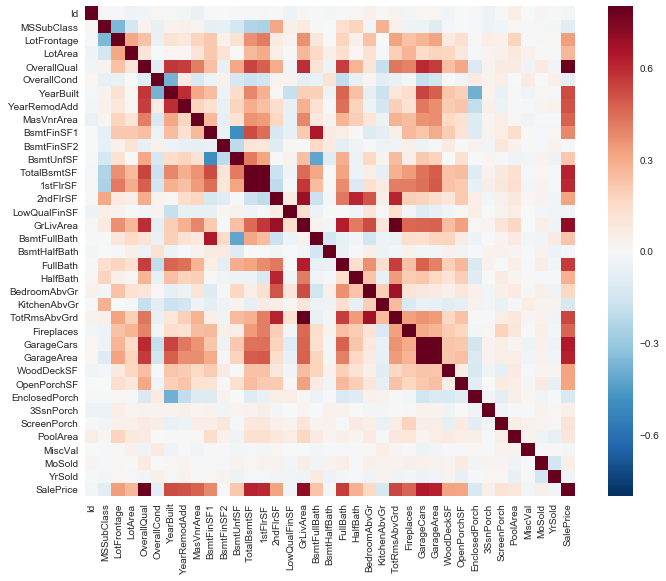

In [14]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8,square=True)

It seems that correlated numberical variables are quite obvious like number of bathrooms overall and number of bathrooms in different floors, or GarageCars/GarageArea which is almost the same variable just measured in two ways.

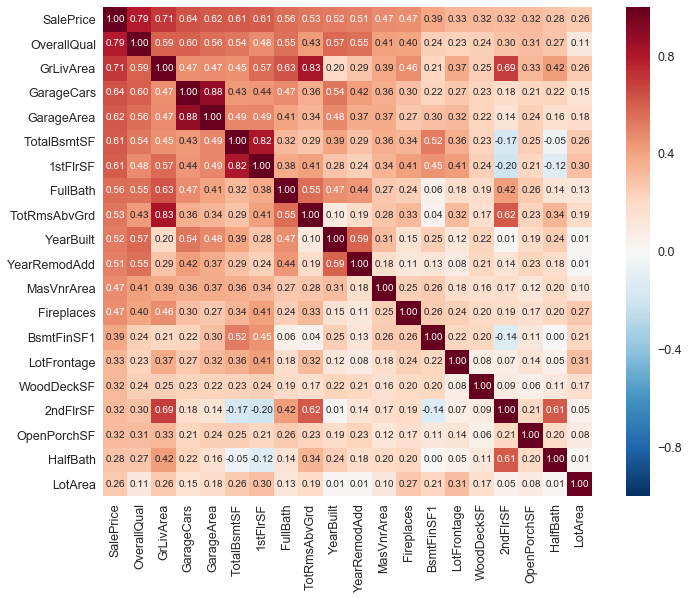

In [15]:
#saleprice correlation matrix
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm=np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

So from numerical variables most important ones are the overall material and finish of the house, size of the house, number of bathrooms, how new the house. Bit surpricingly the size of the garage is so important.

Lets look next the Saleprice variable in train data

In [16]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

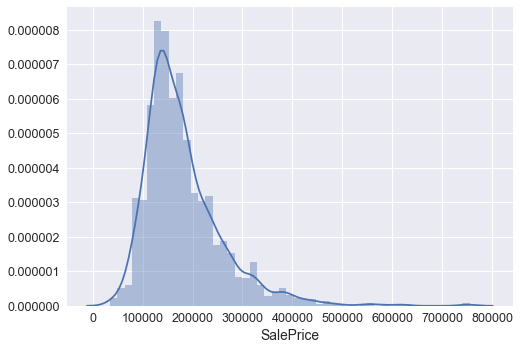

In [17]:
sns.distplot(df_train['SalePrice'])

In [18]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())

Skewness: 1.882876


Saleprice data is skewed so lets make a log transformation to get it more normal distributed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11597f0b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11608fcc0>]], dtype=object)

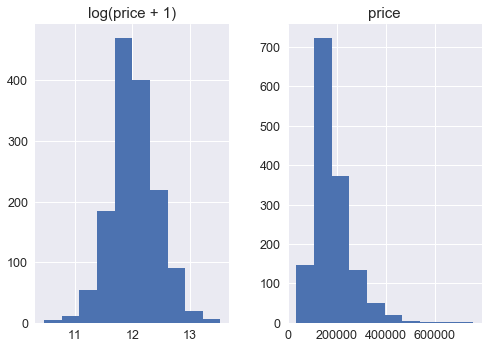

In [19]:
#Log transform for skewed data
prices = pd.DataFrame({"price":df_train["SalePrice"], "log(price + 1)":np.log1p(df_train["SalePrice"])})
prices.hist()

In [20]:
#log transform the target and drop it from train data:
y = np.log1p(df_train["SalePrice"])
df_train=df_train.drop(['SalePrice'],axis=1)

Lets also do log transform for all the skewed features

In [21]:
#log transform skewed numeric features:
numeric_features = df_train.dtypes[df_train.dtypes != "object"].index
#compute skewness
skewed_features = df_train[numeric_features].apply(lambda x: skew(x)) 
skewed_features = skewed_features[skewed_features > 0.75].index
df_train[skewed_features] = np.log1p(df_train[skewed_features])
df_test[skewed_features]=np.log1p(df_test[skewed_features])

Next Lets change categorical variables to dummy variables

In [22]:
all_data = pd.concat((df_train,
                      df_test))
all_data = pd.get_dummies(all_data)
X_train = all_data[:df_train.shape[0]]
X_test = all_data[df_train.shape[0]:]

# Regression
Then lets try different Regression models to predict the data.<br>
Models chosen are:<br>
Ridge Regression which has L2 regularization.<br>
Lasso Regression which has L1 regularization.<br>
XGBoost Regression.<br>
Measure for accuracy is RMSE 

In [23]:
#Lets define the accuracy metric
def rmse(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [24]:
#Lasso and Ridge Regression with different parameters
from sklearn.linear_model import Ridge, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
model_lasso = LassoCV(alphas = [10,1, 0.1, 0.005,0.003,0.001,0.0009,0.0008,0.0005]).fit(X_train, y)
model_ridge = RidgeCV(alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]).fit(X_train, y)

Lasso Regression does feature selection, giving zero weights to least important variables.

In [25]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso Variables:\nNumber of chosen variables:" + str(sum(coef != 0)) +"\n"
"Number of eliminated variables:"+  str(sum(coef == 0)))

Lasso Variables:
Number of chosen variables:104
Number of eliminated variables:151


In [26]:
coef.sort_values(ascending=False)

GrLivArea                0.403517
Neighborhood_StoneBr     0.108045
Neighborhood_Crawfor     0.099448
Neighborhood_NoRidge     0.080082
LotArea                  0.076738
Functional_Typ           0.074130
Neighborhood_NridgHt     0.073546
KitchenQual_Ex           0.072767
Exterior1st_BrkFace      0.067081
RoofMatl_WdShngl         0.059250
OverallQual              0.056568
Condition1_Norm          0.049866
OverallCond              0.042989
GarageCars               0.041071
Neighborhood_BrkSide     0.040631
1stFlrSF                 0.035712
Neighborhood_Somerst     0.035395
BsmtFullBath             0.030956
Neighborhood_ClearCr     0.029330
LotConfig_CulDSac        0.029236
SaleType_New             0.028189
HeatingQC_Ex             0.025359
BldgType_1Fam            0.022648
FullBath                 0.022543
SaleCondition_Normal     0.021805
Foundation_PConc         0.021805
LandSlope_Mod            0.020881
Fireplaces               0.019849
Heating_GasW             0.019594
TotalBsmtSF   

Not surpricing that GrLivingArea, neighbourhoods and MSZoning have biggest weights as size of the house and good neighbourhood are important. It is however interesting that Clay or Tile roofs are negative weight on house price.

In [27]:
#XGBoost Regressor
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators=600, max_depth=4, learning_rate=0.05,colsample_bytree=0.2,min_child_weight=1.5,reg_alpha=0.6) #tuned parameters
model_xgb.fit(X_train, y)

/Users/erno/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.2,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=4,
       min_child_weight=1.5, missing=None, n_estimators=600, nthread=-1,
       objective='reg:linear', reg_alpha=0.6, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

Lets print the accuracies for different models

In [28]:
print('Lasso rmse:',rmse(model_lasso))
print('Ridge rmse:',rmse(model_ridge))
print('xgb rmse:',rmse(model_xgb))

Lasso rmse: [ 0.10389759  0.13158464  0.1271328   0.10711484  0.14845876]
Ridge rmse: [ 0.10998745  0.13510929  0.12991397  0.11191092  0.15288377]
xgb rmse: [ 0.10949645  0.13509752  0.12508296  0.10947241  0.12684818]


Lasso and XGboost worked best so lets take predictions from them

In [29]:
#Predictions
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

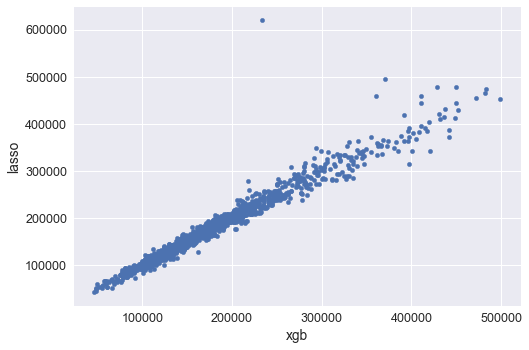

In [30]:
#Scatter plot of Lasso and XGboost predictions
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

As there are some outliners I take average of the two models

In [31]:
preds = 0.6*lasso_preds + 0.4*xgb_preds
solution = pd.DataFrame({"Id":df_test.Id, "SalePrice":preds})
solution.to_csv("lasso_xgb_sol.csv", index = False)